# Comparaison MFCC Kaldi et python  
Un petit programme pour comparer les MFCC generees par kaldi et python

In [1]:
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc
import matplotlib.pyplot as plt

In [2]:
# Calcul de la MFCC avec python
sample_rate, samples = wavfile.read("test/test.wav")
M = mfcc(samples, sample_rate, nfft=1200)
np.savetxt('test/test_mfcc_python.txt', M, fmt='%.5f', delimiter='\t', newline='\n')

In [3]:
# importation des mfcc stockees dans les fichiers
kaldi_mfcc = np.transpose(np.loadtxt('test/test_mfcc_kaldi.txt', skiprows=1, comments=']'))
# skiprow pour ne pas garder le nom du fichier inscrit par kaldi, comment=']' pour ne pas garder la fermeture d'acolade a la fin du fichier
python_mfcc = np.transpose(np.loadtxt('test/test_mfcc_python.txt'))
print "kaldi mfcc shape %dx%d"%np.shape(kaldi_mfcc)
print "python mfcc shape %dx%d"%np.shape(python_mfcc)

kaldi mfcc shape 20x400
python mfcc shape 13x399


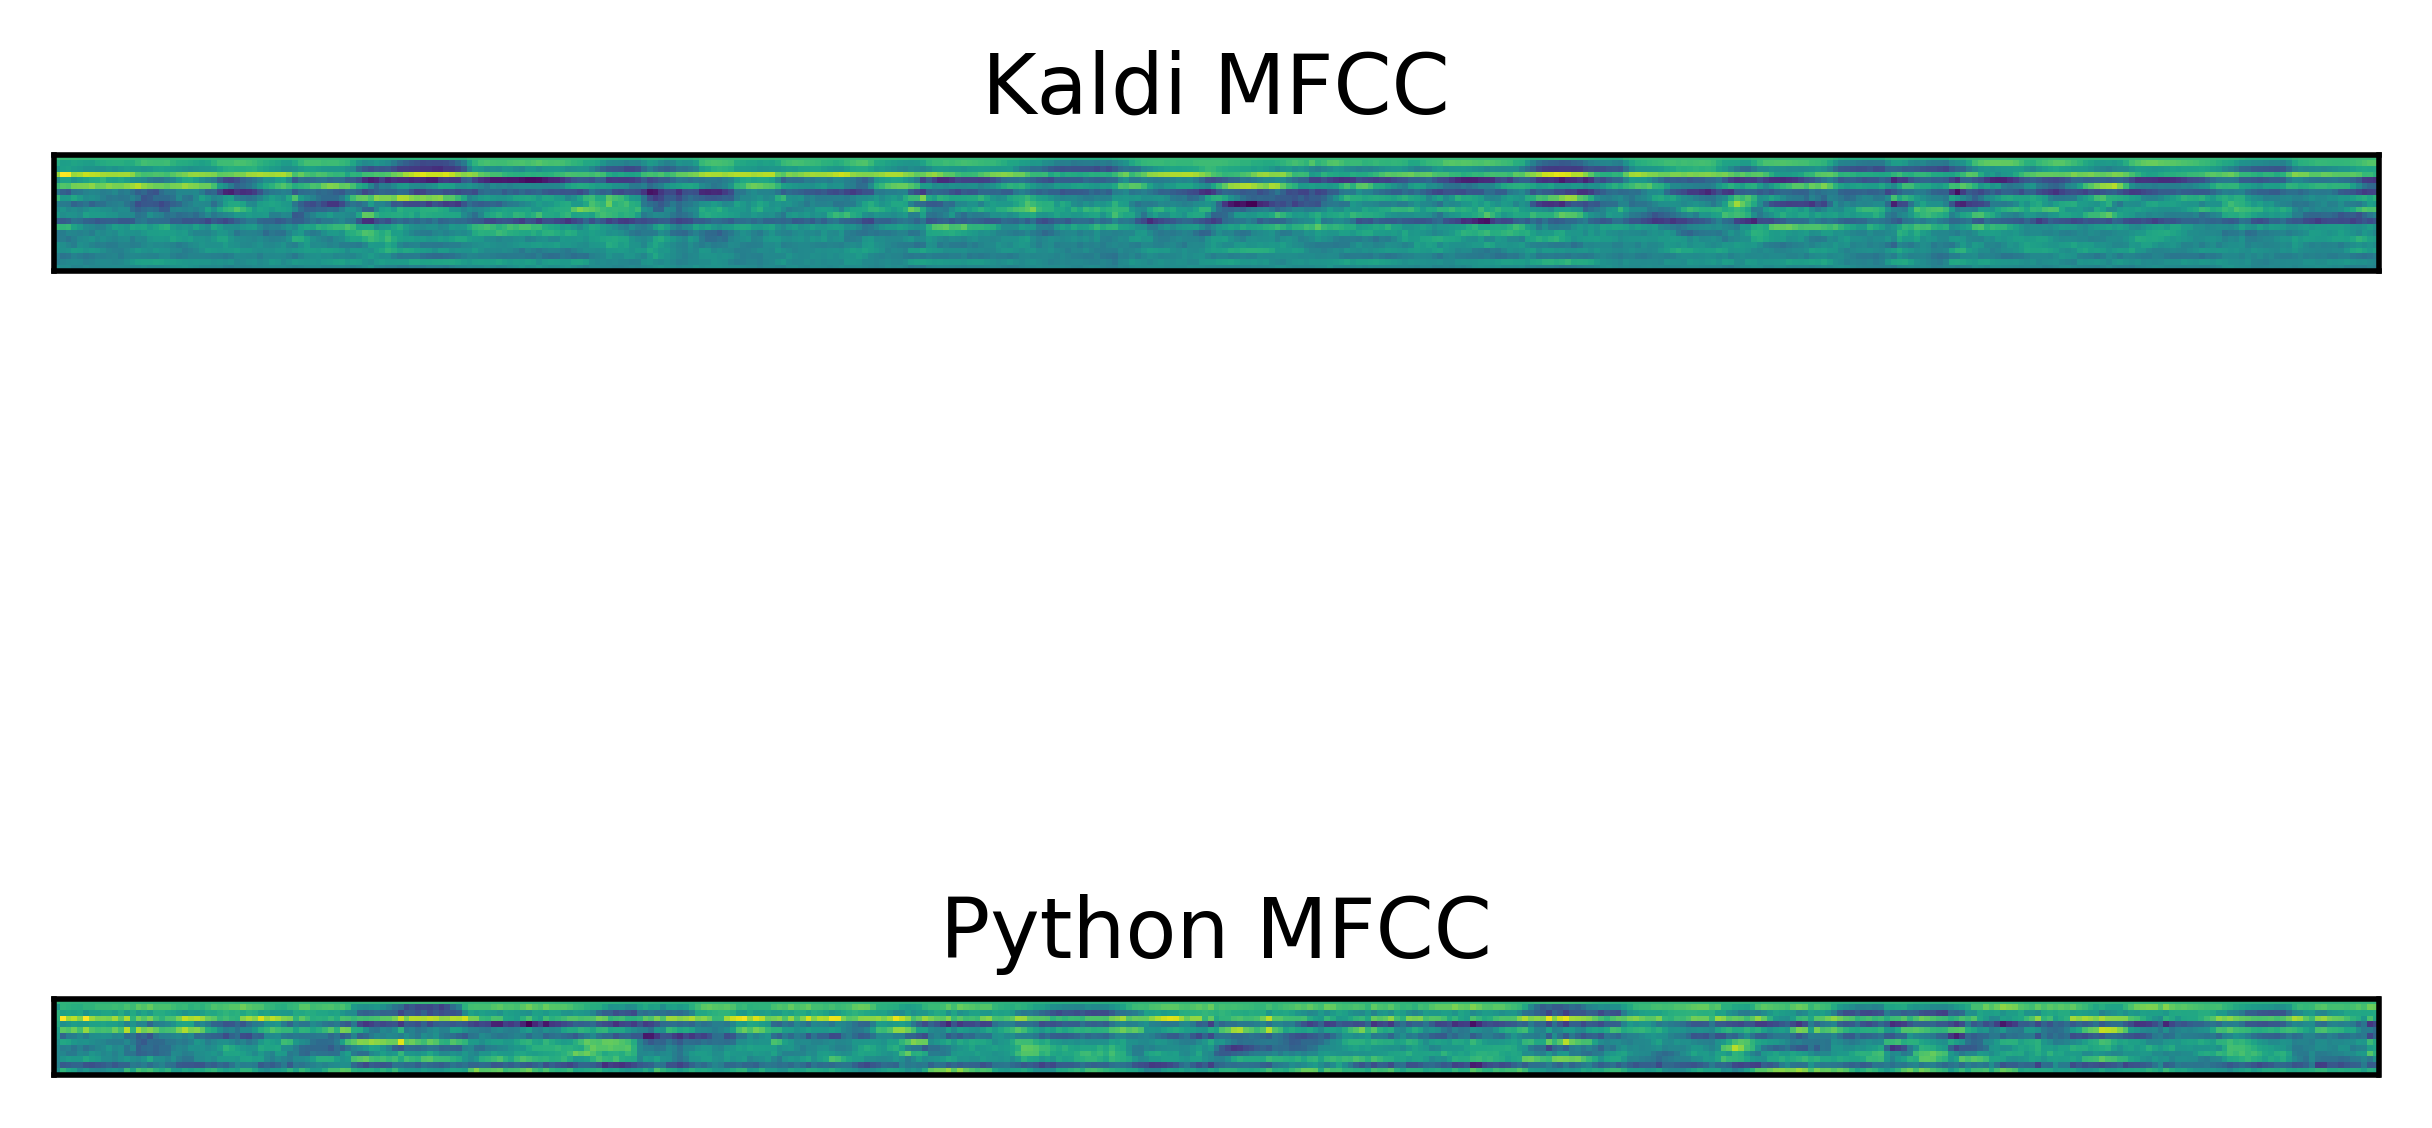

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=500)

ax = axes.flat[0]
ax.imshow(kaldi_mfcc)
ax.set_title('Kaldi MFCC')
ax.set_xticks([])
ax.set_yticks([])

ax = axes.flat[1]
im = ax.imshow(python_mfcc)
ax.set_title('Python MFCC')
ax.set_xticks([])
ax.set_yticks([])

    
# fig.subplots_adjust(right=1.1)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()

## Conclusion  
Les mfcc de kaldi semblent donner un resultat similaire, mais **pas identique** pour autan.  
On remarquera principalement la diference de taille des matrices.  
Prochaine etape : voir si les mfcc de kaldi donnent un meilleur resultat que celles de python dans le DNN.